In [1]:
import pathlib as pt
import scipy.io as scio
import matplotlib.pyplot as plt
import torch

We can use the [pathlib]("https://docs.python.org/3/library/pathlib.html") library to read the files within a folder

In [2]:
current_folder = pt.Path(".")
mat_folder = current_folder/"mat_files"
mat_files = list(mat_folder.glob("*.mat"))
first_mat_file = mat_files[0]
print(first_mat_file)

mat_files\wall_h20_l48.mat


The scipy.io function "[loadmat](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html)" will load the dictionary containing our mat data

In [3]:
data_dict = scio.loadmat(first_mat_file)
data_dict.keys()

dict_keys(['__header__', '__version__', '__globals__', 'h', 'th', 'wss_z', 'z'])

We need to create a new dictionary which defines the inputs "x" and outputs "y" of our deep learning model. The inputs of the dictionary will be tensors of dimensions channels, height and width. First we will convert our data into torch tensors. We can do this for our data in one line using a [dictioanry comprehension](https://www.programiz.com/python-programming/dictionary-comprehension).

In [4]:
torch_tensor_data = {key: torch.from_numpy(data) for key, data in data_dict.items() if not key.startswith("_")}

Now we can stack our data data with a a [list comprehension](https://www.programiz.com/python-programming/list-comprehension) and expand our output tensor so that we obtain tensors of the correct shape

In [5]:
input_feature_names = ["h", "th", "z"]
x = torch.stack([torch_tensor_data[key] for key in input_feature_names])
y = torch_tensor_data["wss_z"][None, :]
print(x.shape, y.shape)

torch.Size([3, 541, 864]) torch.Size([1, 541, 864])


Now that we know how to process the data let's create a function wich process our mat files into torch data. 

In [6]:
def mat_to_torch(
    mat_path, 
    input_feature_names=["h", "th", "z"],
    output_feature_names=["wss_z"]
): 
    data_dict = scio.loadmat(mat_path)
    torch_tensor_data = {key: torch.from_numpy(data) for key, data in data_dict.items       () if not key.startswith("_")}
    x = torch.stack([torch_tensor_data[key] for key in input_feature_names])
    y = torch.stack([torch_tensor_data[key] for key in output_feature_names])
    if len(x.shape) == 2: x=x[None,:]
    if len(y.shape) == 2: y=y[None,:]
    return x, y

In [7]:
x, y = mat_to_torch(first_mat_file)

In [8]:
print(x.shape, y.shape)

torch.Size([3, 541, 864]) torch.Size([1, 541, 864])


Now we can process all the data and save them into our torch folder as single files

mat_files\wall_h20_l48.mat


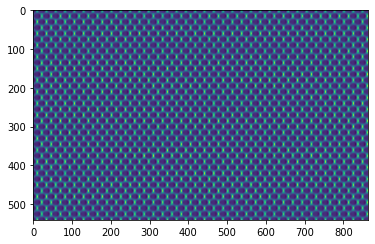

mat_files\wall_h40_l24.mat


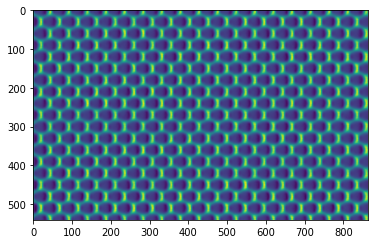

mat_files\wall_h60_l12.mat


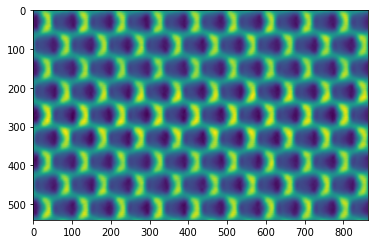

mat_files\wall_h60_l16.mat


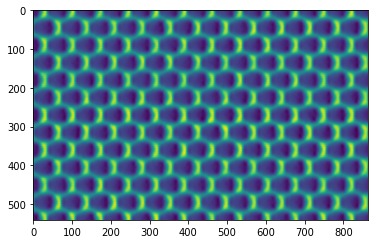

mat_files\wall_h60_l24.mat


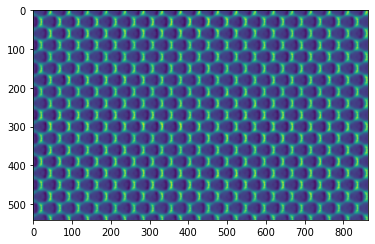

mat_files\wall_h60_l32.mat


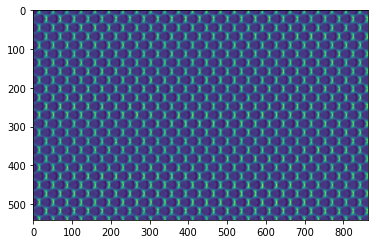

mat_files\wall_h60_l8.mat


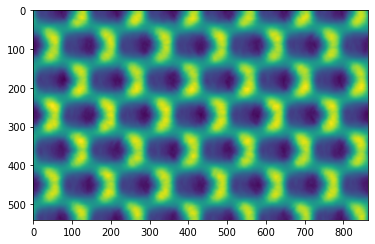

mat_files\wall_h80_l12.mat


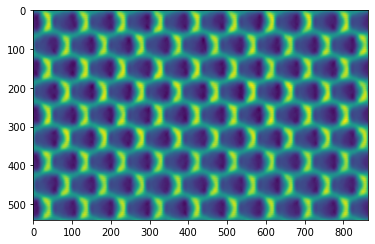

In [9]:
torch_folder = current_folder/"torch_files"
for path in mat_files:
    print(path)
    x,y = mat_to_torch(path)
    torch.save(
        {
            "x":x,
            "y":y
        },
       torch_folder/path.stem
    )
    plt.imshow(y[0])
    plt.show()